In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import util.df_enricher as jn
import util.jndb as db

In [2]:
ratings = jn.get_enriched_card_ratings()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77809 entries, 0 to 77808
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   syllabus_name     77809 non-null  category      
 1   subject_name      77809 non-null  category      
 2   chapter_id        77809 non-null  int64         
 3   chapter_name      77809 non-null  object        
 4   card_id           77809 non-null  int64         
 5   card_type         77809 non-null  category      
 6   difficulty_level  77809 non-null  int64         
 7   timestamp         77809 non-null  datetime64[ns]
 8   time_spent        77809 non-null  int64         
 9   rating            77809 non-null  category      
 10  prior_le          77809 non-null  float64       
 11  rating_num        77809 non-null  category      
 12  is_correct        77809 non-null  category      
 13  attempt_num       77809 non-null  int64         
 14  gap_duration      7780

In [3]:
# Compute the error percentage across card types.

ct = pd.crosstab( ratings.card_type, ratings.is_correct, margins=True, margins_name='Total' )
err_pct = []
for idx,row in ct.iterrows():
    err_pct.append( (row[0]/row['Total'])*100 )
ct['err_pct'] = err_pct
ct

is_correct,0,1,Total,err_pct
card_type,,,,
fib,5010,35545,40555,12.353594
image_label,20,65,85,23.529412
matching,59,658,717,8.228731
multi_choice,890,7104,7994,11.133350
question_answer,2615,19460,22075,11.845980
true_false,591,5792,6383,9.258969
Total,9185,68624,77809,11.804547


In [7]:
# Check the correlation of parameters used for regression

reg_params = ratings[ratings.card_type == 'question_answer']
reg_params = reg_params[reg_params.attempt_num > 2]
reg_params = reg_params[['subject_num','difficulty_level','time_spent','attempt_num', 'gap_duration', 'prior_le']]

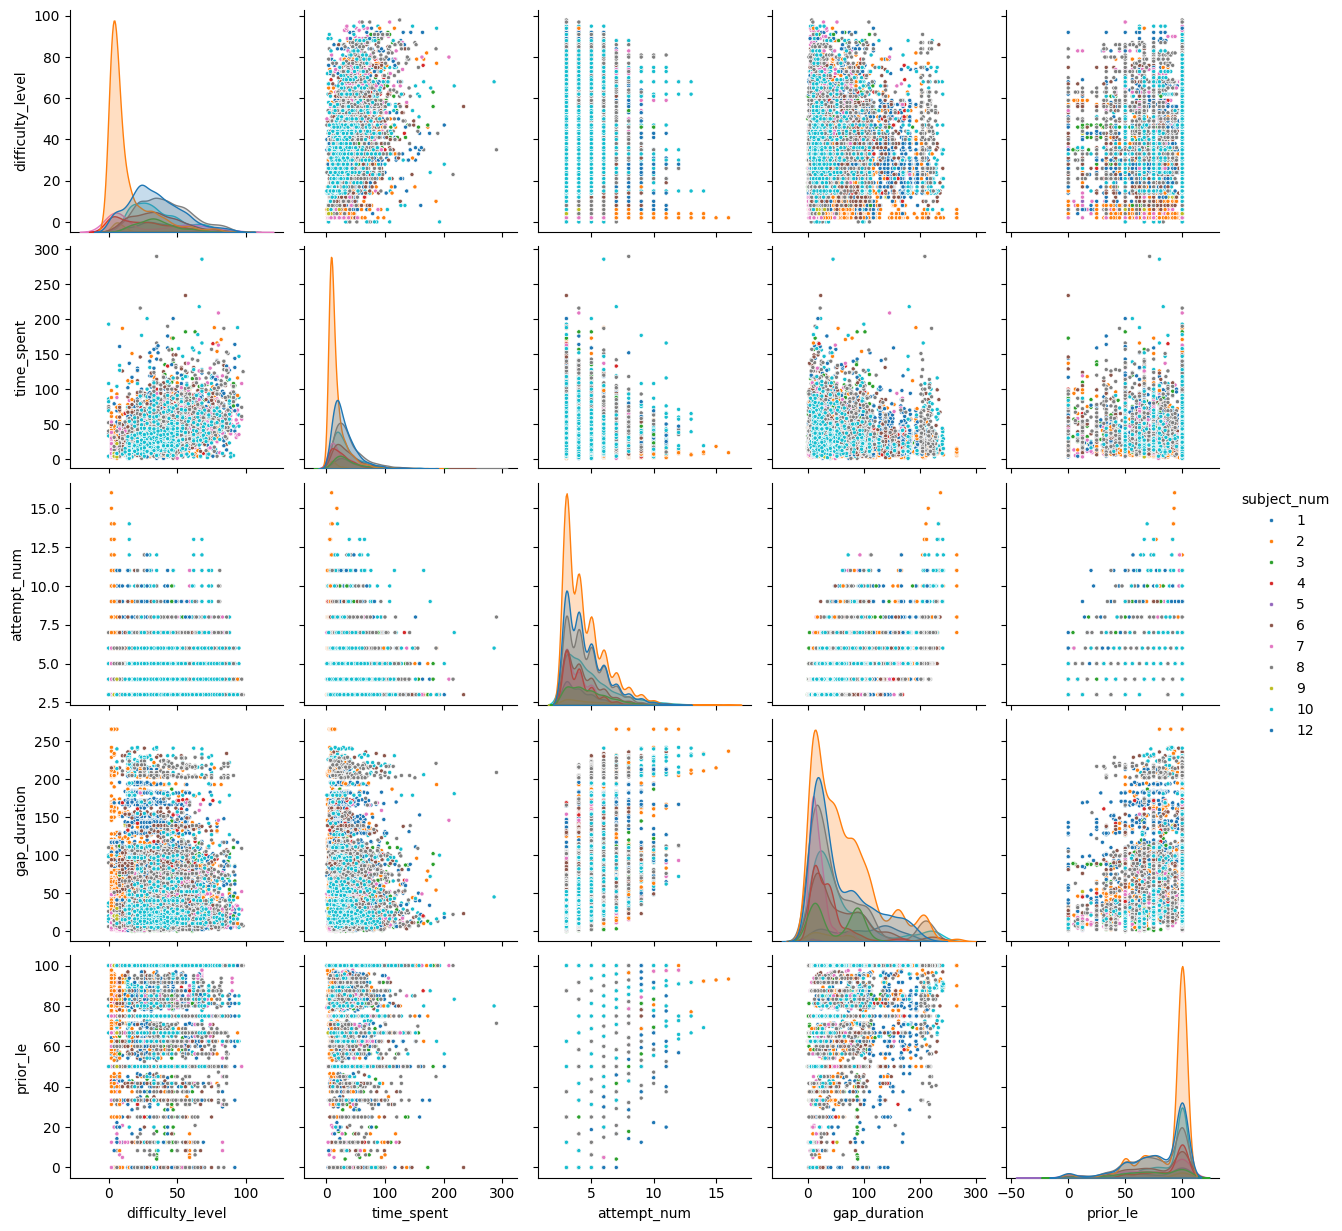

In [12]:
sns.pairplot( reg_params, hue='subject_num',palette='tab10',markers='.' )